# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import Model, Input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical
import numpy as np

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [27]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [28]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [29]:
## load dataset here
df = pd.read_csv("C:/Users/Admin/năm ba/Nhập môn máy học/TH/Fundamental-ML-main/data/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [30]:
## parsing data here
images, labels = parse_data(df)


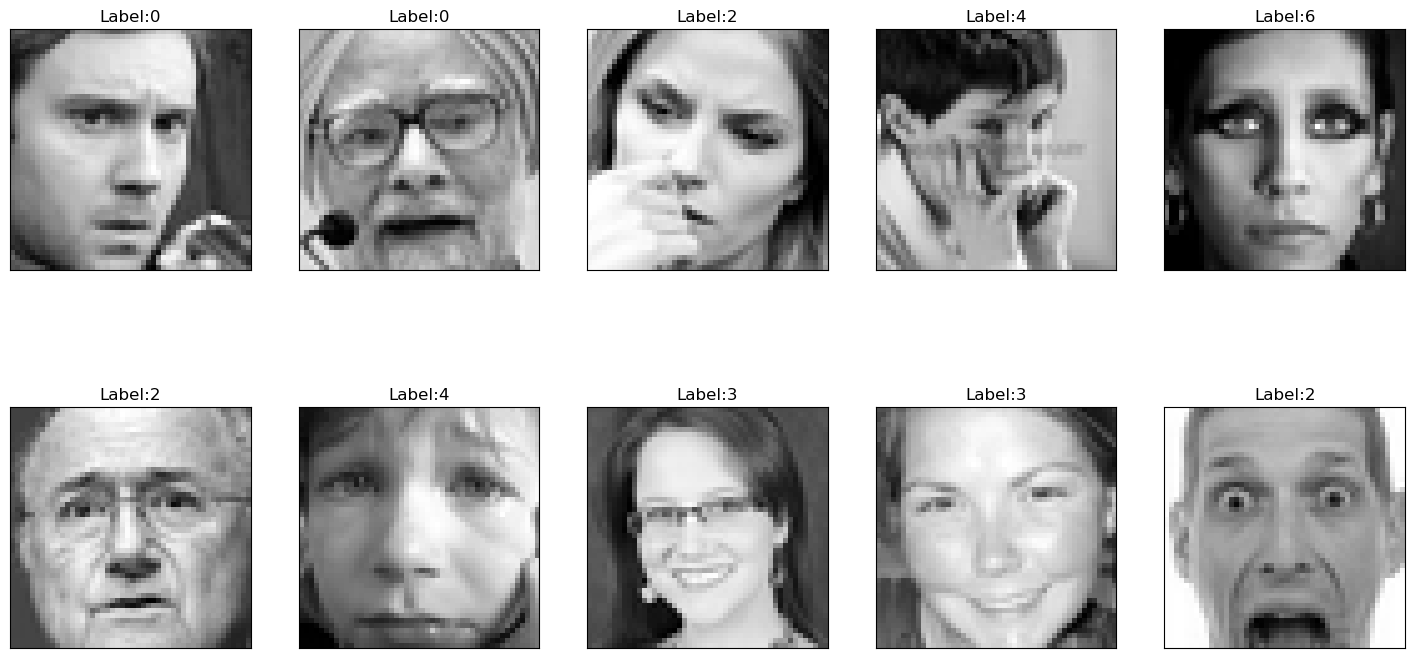

In [31]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [32]:
from sklearn.decomposition import PCA

# Flatten hình ảnh thành mảng 2 chiều
n_samples, height, width = images.shape
images_flattened = images.reshape(n_samples, height * width)

# Áp dụng PCA
pca_2_components = PCA(n_components=2)
pca_2_components = pca_2_components.fit(images_flattened) 

In [33]:
## transform for visualizing here
images_pca_2_components=pca_2_components.transform(images_flattened) ## modify images' array to the appropriate shape
images_pca_2_components.shape
images_pca_2_components

array([[  691.75085917,  -442.32864861],
       [  -62.02548935,   561.76220694],
       [-1322.53807047,  -415.72968868],
       ...,
       [-1289.15565244, -1408.56832004],
       [ 2008.41357066,  -125.61090825],
       [ -210.23902665,  -486.56909887]])

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [34]:
## determine the optimal number of PCs here

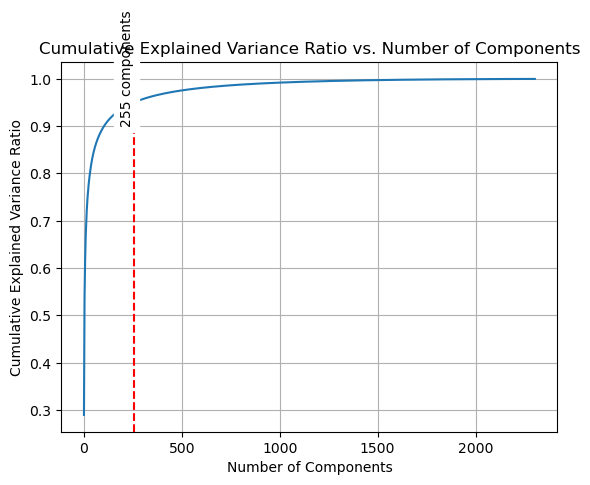

Number of components to retain 95% of the data variance: 255


In [35]:
# Flatten images into a 2D array
n_samples, height, width = images.shape
images_flattened = images.reshape(n_samples, height * width)

# Apply PCA
pca = PCA()
pca.fit(images_flattened)

# Plot cumulative explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)

# Find the number of components to retain 95% of the data variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

plt.axvline(x=n_components_95, color='red', linestyle='--')
plt.text(n_components_95, 0.90, f'{n_components_95} components', rotation=90, va='bottom', ha='right', backgroundcolor='white')

plt.show()

print(f'Number of components to retain 95% of the data variance: {n_components_95}')

In [36]:
## Explain the selection process

At first, we choose a threshold of 95% variance to balance between reducing dimensions and preserving information. Then we use ```pca.explained_variance_``` to measure how much of the total variance in the original dataset is explained by each principal component. Next, we draw the cumulative explained variance plot to show adding more components captures more variance in the data.  
Finally, the result comes out to be 255 components. This number also sits right on the knee of the curve (The knee means even if you add more components, it won't help explain the data variance any much more).  This is the optimal number of principal components using ```pca.explained_variance_```.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

### 3.1 Build models

In [37]:
pca_opt = PCA(n_components=n_components_95)
images_pca = pca_opt.fit_transform(images_flattened)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(images_pca, labels, test_size=0.2, random_state=42)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


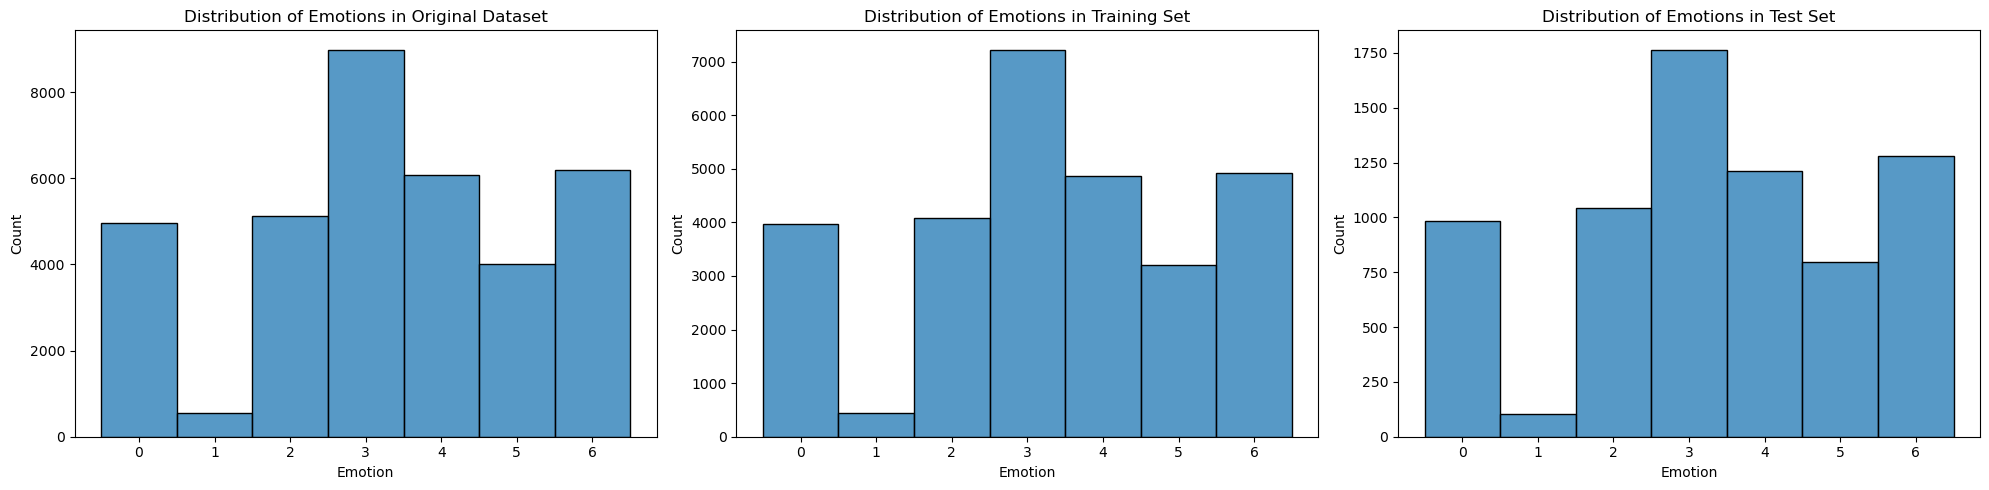

In [39]:
# Create DataFrames for easier handling
original_labels_df = pd.DataFrame({'emotion': labels})
train_labels_df = pd.DataFrame({'emotion': y_train})
test_labels_df = pd.DataFrame({'emotion': y_test})

# Plotting the distribution of emotions
plt.figure(figsize=(20, 5))

# Original dataset
plt.subplot(1, 3, 1)
sns.histplot(original_labels_df['emotion'], bins=np.arange(-0.5, len(np.unique(labels)), 1), kde=False)
plt.title('Distribution of Emotions in Original Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Training set
plt.subplot(1, 3, 2)
sns.histplot(train_labels_df['emotion'], bins=np.arange(-0.5, len(np.unique(y_train)), 1), kde=False)
plt.title('Distribution of Emotions in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Test set
plt.subplot(1, 3, 3)
sns.histplot(test_labels_df['emotion'], bins=np.arange(-0.5, len(np.unique(y_test)), 1), kde=False)
plt.title('Distribution of Emotions in Test Set')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The proportions of different emotions in the original data, test set, and train set are similar. This helps ensure that the model trained on the training set can generalize well to unseen data and the evaluation metrics on the test set will accurately reflect the model's performance.

#### 3.1.1 Machine learning model (Random Forest)

##### First Random Forest Model

In [40]:
def get_accuracy_random_forest(X_train, X_test, y_train, y_test, params):
    rf = RandomForestClassifier(**params, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Single set of random parameters to try
params_1 = {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2}

# Get accuracy on original data
accuracy_original_1 = get_accuracy_random_forest(X_train, X_test, y_train, y_test, params_1)
print(f'Accuracy on original data: {accuracy_original_1:.4f}')

# Get accuracy on PCA data
accuracy_pca_1 = get_accuracy_random_forest(X_train_pca, X_test_pca, y_train_pca, y_test_pca, params_1)
print(f'Accuracy on PCA data: {accuracy_pca_1:.4f}')

Accuracy on original data: 0.4524
Accuracy on PCA data: 0.3791


##### Second Random Forest Model

In [41]:
# Single set of random parameters to try
params_2 = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2} # Change this line from a tuple to a dictionary

# Get accuracy on original data
accuracy_original_2 = get_accuracy_random_forest(X_train, X_test, y_train, y_test, params_2)
print(f'Accuracy on original data: {accuracy_original_2:.4f}')

# Get accuracy on PCA data
accuracy_pca_2 = get_accuracy_random_forest(X_train_pca, X_test_pca, y_train_pca, y_test_pca, params_2)
print(f'Accuracy on PCA data: {accuracy_pca_2:.4f}')

Accuracy on original data: 0.4044
Accuracy on PCA data: 0.3281


##### Third Random Forest Model

In [42]:
# Single set of random parameters to try
params_3 = {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 4}  # Changed to dictionary

# Get accuracy on original data
accuracy_original_3 = get_accuracy_random_forest(X_train, X_test, y_train, y_test, params_3)
print(f'Accuracy on original data: {accuracy_original_3:.4f}')

# Get accuracy on PCA data
accuracy_pca_3 = get_accuracy_random_forest(X_train_pca, X_test_pca, y_train_pca, y_test_pca, params_3)
print(f'Accuracy on PCA data: {accuracy_pca_3:.4f}')

Accuracy on original data: 0.4635
Accuracy on PCA data: 0.3923


#### 3.1.2 MLP model (CNN)

In [43]:
# Extract features (pixels) and labels (emotion)
X = np.array(df['pixels'].apply(lambda x: np.fromstring(x, sep=' ')))
X = np.vstack(X)  # Reshape to a 2D array of shape (n_samples, n_features)
X = X.reshape(-1, 48, 48, 1)  # Reshape to images with single channel (grayscale)
y = to_categorical(df['emotion'])  # Convert labels to categorical

# Split the data into training and testing sets
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks (optional)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history_1 = model.fit(X_train_cnn, y_train_cnn,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test_cnn, y_test_cnn),
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
score_1 = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print("Test accuracy using CNN model on original data:", score_1[1])



C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.2994 - loss: 2.6175 - val_accuracy: 0.4213 - val_loss: 1.5163
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.4297 - loss: 1.4786 - val_accuracy: 0.4542 - val_loss: 1.4316
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.4918 - loss: 1.3380 - val_accuracy: 0.4866 - val_loss: 1.3458
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.5309 - loss: 1.2351 - val_accuracy: 0.4962 - val_loss: 1.3277
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.5651 - loss: 1.1504 - val_accuracy: 0.5042 - val_loss: 1.3089
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.5916 - loss: 1.0827 - val_accuracy: 0.5065 - val_loss: 1.3306
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.6255 - loss: 0.9938 - val_accuracy: 0.5114 - val_loss: 1.3400
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.6636 - loss: 0.9153 - 

In [44]:
# Reshape PCA-transformed data back to 48x48 images
X_train_images = pca_opt.inverse_transform(X_train_pca).reshape(-1, 48, 48, 1)
X_test_images = pca_opt.inverse_transform(X_test_pca).reshape(-1, 48, 48, 1)

# Convert labels to categorical format
y_train_categorical = to_categorical(y_train_pca, num_classes=7)
y_test_categorical = to_categorical(y_test_pca, num_classes=7)

# Train the model
history_2 = model.fit(X_train_images, y_train_categorical,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test_images, y_test_categorical),
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
score_2 = model.evaluate(X_test_images, y_test_categorical, verbose=0)
print("Test accuracy using CNN model on PCA-transformed data:", score_2[1])

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.4994 - loss: 1.3121 - val_accuracy: 0.4904 - val_loss: 1.3543
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.5479 - loss: 1.1905 - val_accuracy: 0.4954 - val_loss: 1.3488
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.5773 - loss: 1.1309 - val_accuracy: 0.4939 - val_loss: 1.3708
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.6242 - loss: 1.0075 - val_accuracy: 0.4948 - val_loss: 1.4012
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.6521 - loss: 0.9254 - val_accuracy: 0.4958 - val_loss: 1.4889
Test accuracy using CNN model on PCA-transformed data: 0.49038729071617126


### 3.2 Hyperparameter tuning using GridCV

In [45]:
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model and its accuracy on original data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

# Create and fit GridSearchCV on PCA data
grid_search_pca = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_pca.fit(X_train_pca, y_train_pca)

# Get the best model and its accuracy on PCA data
best_rf_pca = grid_search_pca.best_estimator_
y_pred_pca = best_rf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

print(f'Accuracy on original data (after GridSearchCV): {accuracy_original:.4f}')
print(f'Accuracy on PCA data (after GridSearchCV): {accuracy_pca:.4f}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Accuracy on original data (after GridSearchCV): 0.4682
Accuracy on PCA data (after GridSearchCV): 0.4019


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a function to create the Keras model
def create_cnn_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    if dropout_rate > 0:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(7, activation='softmax'))  # Assuming there are 7 emotion classes
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap Keras model using KerasClassifier
model = KerasClassifier(build_fn=create_cnn_model, verbose=0)

# Define parameters for GridSearchCV
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'batch_size': [16, 32],
    'epochs': [20, 30],
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_train_images, y_train)

# Print results
print('Best score = {:.4f} using {}'.format(grid_result.best_score_, grid_result.best_params_))


Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Admin\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We encountered some warnings that we couldn't fully understand or fix. The first warns about the future renaming of build_fn to model in SciKeras, and the second advises against passing input_shape directly to a layer in Keras. Despite trying different approaches, we couldn't resolve them.

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
## visualize the confusion matrices and classification reports here